In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import requests
from datetime import datetime

In [2]:
# Age Variables, head of household

year_of_birth = 1992
Age_diff_spouse = 4
retirement_year = 2028
# Investment Variables

# stock market parameters
stock_market_mean_yoy_growthrate_percent = 8
stock_market_std_yoy_growthrate = 0.180977

Investments = {
    'Ret_accnts' :  {
        'type': 'stock_retirement',
        'current_value': 207000,
        'beta': 1,
        'mean_yoy_growthrate_percent': 10, 
        'std_yoy_growthrate': 0.180977,
        'additions_yearly' : 0,
        'currency' : 'USD'
    },
    'TSLA' :  {
        'type': 'stock',
        'current_value': 790000,
        'beta': 1,
        'mean_yoy_growthrate_percent': 10, 
        'std_yoy_growthrate': 0.180977,
        'additions_yearly' : 0,
        'currency' : 'USD'
    },
    'Diversiifed_stock' :  {
        'type': 'stock',
        'current_value': 513000,
        'beta': 1,
        'mean_yoy_growthrate_percent': 10, 
        'std_yoy_growthrate': 0.180977,
        'additions_yearly' : 0,
        'currency' : 'USD'
    },
    'Marcus' :  {
        'type': 'cash_certificate',
        'current_value': 20000,
        'additions_yearly' : 0,
        'mean_yoy_growthrate_percent': 5,
        'currency' : 'USD'
    },
    'ret_home' : {
        'type': 'real_estate',
        'current_value': 24900000,
        'mean_yoy_growthrate_percent': 7,
        'down_percent': 20,
        'mortgage_term': 30, # Years
        'mortgage_start_year': retirement_year,
        'mortgage_percent': 9.85,
        'closing_costs_onetime': 3500000,
        'currency': 'INR', # Currency of loan
        'rental_income': 0,
        'rental_income_yoy_inc_percent': 3,
        'property_tax_percent': 1.36,
        'HOA_or_maintainance': 2000,
        'home_insurance': 13900,
        'yearly_misc_repair_or_other': 120000
        
    },
    'us_bent' : {
        'type': 'real_estate',
        'current_value': 300000,
        'mean_yoy_growthrate_percent': 7.83,
        'down_percent': 20,
        'mortgage_term': 30, # Years
        'mortgage_start_year': 2024,
        'mortgage_percent': 6.25,
        'closing_costs_onetime': 30000,
        'currency': 'USD',  # Currency of loan
        'rental_income': 1500,
        'rental_income_yoy_inc_percent': 3,
        'property_tax_percent': 1.36,
        'HOA_or_maintainance': 200,
        'home_insurance': 50,
        'yearly_misc_repair_or_other': 1200
    },
    'Ind_land' : {
        'type': 'real_estate',
        'current_value': 5000000,
        'mean_yoy_growthrate_percent': 5,
        'down_percent': 50, 
        'mortgage_term': 15, # Years
        'mortgage_start_year': 2024,
        'mortgage_percent': 6.25,
        'closing_costs_onetime': 500000,
        'currency': 'INR', # Currency of loan
        'rental_income': 0,
        'rental_income_yoy_inc_percent': 0,
        'property_tax_percent': 1.36,
        'HOA_or_maintainance': 10000,
        'home_insurance': 0,
        'yearly_misc_repair_or_other': 0
    }
}

# Handling_social_security 
social_sec = {
        'type': 'social_security',
        'withdrawl_age' : 62,   # Minimum 62 , Max 68
        'inflated_income_per_month' : 2300,  # In USD , as shown in official social sec calculator
        'avg_cola_yoy_growth' : 2.6,
        'avg_cola_std' : 0.1
}


# USA inflation
USA_inflation_mean = 4
USA_inflation_std = 0.01

# India Living
Monthly_living = 200000
Monthly_living_currency = 'INR' # USD or INR
India_inflation_mean = 7.379
India_inflation_std = 0.04878

# Unexpected expenses percent of living expense
Unexpected_expense_min_percent = 0.5
Unexpected_expense_max_percent = 15

# Post retirement support job
job_income = 2000000
job_yoy_increment_percent = 3
job_years_after_ret = 4
job_parameter_curency = 'INR' # USD or INR

# US tax brackets 
# Federal tax brackets (married filing jointly) for 2023
US_federal_brackets = [
    (0, 22000, 0.10),
    (22000, 89450, 0.12),
    (89450, 190750, 0.22),
    (190750, 364200, 0.24),
    (364200, 462500, 0.32),
    (462500, 693750, 0.35),
    (693750, 1_000_000, 0.37)
]


# California state tax brackets (married filing jointly) for 2023
US_state_brackets = [
    (0, 20198, 0.01),
    (20198, 47884, 0.02),
    (47884, 75576, 0.04),
    (75576, 104910, 0.06),
    (104910, 132590, 0.08),
    (132590, 677278, 0.093),
    (677278, 812728, 0.103),
    (812728, 1354550, 0.113),
    (1354550, 1_000_000, 0.123)
]
# Temporary tax variables
effective_tax_usa = 32
effective_tax_ind = 30

# India tax brackets
India_federal_brackets = [
    (0, 250000, 0.0),
    (250000, 500000, 0.05),
    (500000, 1000000, 0.20),
    (1000000, 10000000, 0.30)
]


# USD to INR rates 
# Fetching the current USD to INR conversion rate from an API

default_USD_to_INR = 83.5 # if live data unavailable
USD_INR_comission_percent = 0.550
USD_INR_mean_growth_percent = 3.040
USD_INR_STD = 0.0557

try : 
    response = requests.get("https://api.exchangerate-api.com/v4/latest/USD")
    data = response.json()
    
    # Extracting the USD to INR conversion rate
    USD_INR_rate = data["rates"]["INR"]
except : 
    USD_INR_rate = default_USD_to_INR
    print('unable to reach server to get live USD to INR, using default USD to INR')

#Calculated_parameters 
current_year = datetime.now().year
target_survival_year = year_of_birth+Age_diff_spouse+100
years_to_calculate = target_survival_year - current_year

unable to reach server to get live USD to INR, using default USD to INR


In [3]:
# Function to calculate mortgage payment (EMI)
def calculate_mortgage_payment(principal, annual_rate, term_years):
    monthly_rate = annual_rate / 12 / 100
    payments = term_years * 12
    return principal * monthly_rate / (1 - (1 + monthly_rate) ** -payments)


In [4]:
# Random Variable Generation 
# Per investment YOY growth percent, include land and stocks
# USD to INR YOY growth 
# India inflation

def gen_simulation_variables():
    rand_var_df = pd.DataFrame()
    rand_var_df['USD_INR_growth'] = np.random.normal(loc=USD_INR_mean_growth_percent,scale = USD_INR_STD,size = years_to_calculate)
    rand_var_df['IND_Inflation_growth'] = np.random.normal(loc=India_inflation_mean,scale = India_inflation_std,size = years_to_calculate)
    rand_var_df['USA_Inflation_growth'] = np.random.normal(loc=USA_inflation_mean,scale = USA_inflation_std,size = years_to_calculate)
    rand_var_df['unexpected_expense_rate'] = np.random.uniform(Unexpected_expense_min_percent, Unexpected_expense_max_percent,size= years_to_calculate)
    rand_var_df['social_sec_growth'] = np.random.normal(loc=social_sec['avg_cola_yoy_growth'],scale = social_sec['avg_cola_std'],size = years_to_calculate)
    for key,invs in Investments.items(): 
        try: 
            means = invs['mean_yoy_growthrate_percent']
        except: 
            means = 5
            print(key,'analysis will be inaccurate for this investment without mean YOY growth')
        try : 
            std_dev = invs['std_yoy_growthrate']
        except :
            std_dev = 0
        # Investments input mean,stdev
        # print(key, 'mean=',means,'stdev=',std_dev)
        rand_var_df[f'{key}_growth'] = np.random.normal(loc=means,scale = std_dev,size = years_to_calculate)

        # Handling_rent_growth 
        if invs['type'] == 'real_estate':
            rand_var_df[f'{key}_rent_growth'] = np.random.normal(loc= invs['rental_income_yoy_inc_percent'],scale = 0,size = years_to_calculate)

    return rand_var_df

# # Investments output mean, stdev
# simulation_var_df = gen_simulation_variables()
# # print(rand_var_df.mean(),rand_var_df.std())
# fig = px.box(simulation_var_df)
# fig.show()
# Investments,years_to_calculate,USD_INR_mean_growth_percent,USD_INR_STD,India_inflation_mean,India_inflation_std,Unexpected_expense_min_percent, Unexpected_expense_max_percent,USA_inflation_mean,USA_inflation_std,social_sec

In [5]:
#Simulating 
#Calculate spend needed per year
# inflation adjusted Living expenses with vacation + Unexpected Expenses (like health) + Real_Estate_EMIs 
# Then calculate pre tax amount needed
# Then subtract retirement job income
# Then calculate post tax amount needed
# TODO: handle mortgages which are already started
def simulate_retirement(simulation_var_df):
    simulation_var_df['year'] =  current_year + simulation_var_df.index
    simulation_var_df['age'] = current_year + simulation_var_df.index - year_of_birth
    for sim_year in simulation_var_df.index: 
        # USD_to_INR rate 
        if sim_year == 0:
            simulation_var_df.loc[sim_year,'usd_inr_rate'] = USD_INR_rate
        else : 
            simulation_var_df.loc[sim_year,'usd_inr_rate'] = simulation_var_df.loc[sim_year-1,'usd_inr_rate']*(1+simulation_var_df.loc[sim_year,'USD_INR_growth']/100)
            
        # Calculation inflated living and unexpected expense
        try : 
            simulation_var_df.loc[sim_year,'inflated_living'] = simulation_var_df.loc[sim_year-1,'inflated_living'] * (1+ (simulation_var_df.loc[sim_year-1,'IND_Inflation_growth'])/100)
        except: 
            simulation_var_df.loc[sim_year,'inflated_living'] = Monthly_living
        
        # making living expense zero until retirment year      
        if simulation_var_df.loc[sim_year,'year'] < retirement_year: 
            simulation_var_df.loc[sim_year,'living_expense'] =0
            simulation_var_df.loc[sim_year,'unexpected_expense'] = 0
        else :
            simulation_var_df.loc[sim_year,'living_expense'] = simulation_var_df.loc[sim_year,'inflated_living']*12
            simulation_var_df.loc[sim_year,'unexpected_expense'] =  simulation_var_df.loc[sim_year,'living_expense']* (simulation_var_df.loc[sim_year,'unexpected_expense_rate']/100)
    
        # Post retirement support job
        if (simulation_var_df.loc[sim_year,'year'] < retirement_year) or (simulation_var_df.loc[sim_year,'year'] > retirement_year + job_years_after_ret) : 
            simulation_var_df.loc[sim_year,'ret_job_inc'] = 0
        elif simulation_var_df.loc[sim_year,'year'] == retirement_year:
            simulation_var_df.loc[sim_year,'ret_job_inc'] = job_income 
        else :
            simulation_var_df.loc[sim_year,'ret_job_inc'] = simulation_var_df.loc[sim_year -1 ,'ret_job_inc']* (1+job_yoy_increment_percent/100)
    
        # Net living needed INR = living + unexpected - ret_job
        simulation_var_df.loc[sim_year,'post_tax_living_USD_needed'] = (simulation_var_df.loc[sim_year,'living_expense'] +simulation_var_df.loc[sim_year,'unexpected_expense'] - simulation_var_df.loc[sim_year,'ret_job_inc'])/simulation_var_df.loc[sim_year,'usd_inr_rate']
    
        # init
        simulation_var_df.loc[sim_year,'post_tax_all_mortgage'] = 0
        # calculate Mortgage for real_estate_investments
        for key,invs in Investments.items(): 
            if invs['type'] == 'real_estate':
                # Base yearly mortgage expenses
                if (simulation_var_df.loc[sim_year,'year'] < invs['mortgage_start_year'])or(simulation_var_df.loc[sim_year,'year'] > invs['mortgage_start_year']+invs['mortgage_term']) :
                    simulation_var_df.loc[sim_year,f'{key}_base_mortgage'] = 0
                else : 
                    simulation_var_df.loc[sim_year,f'{key}_base_mortgage'] = calculate_mortgage_payment(invs['current_value']*(1-invs['down_percent']/100),invs['mortgage_percent'],invs['mortgage_term'])*12
                
                # Maintiannace or other expenses to maintian relaestate that can be inflated
                if simulation_var_df.loc[sim_year,'year'] <= invs['mortgage_start_year']:
                    simulation_var_df.loc[sim_year,f'{key}_inflated'] = invs['yearly_misc_repair_or_other']+ invs['HOA_or_maintainance']
                elif invs['currency'] == 'USD':
                    simulation_var_df.loc[sim_year,f'{key}_inflated'] = simulation_var_df.loc[sim_year-1,f'{key}_inflated'] * (1+simulation_var_df.loc[sim_year,'USA_Inflation_growth']/100)
                else : 
                    simulation_var_df.loc[sim_year,f'{key}_inflated'] = simulation_var_df.loc[sim_year-1,f'{key}_inflated'] * (1+simulation_var_df.loc[sim_year,'IND_Inflation_growth']/100)
    
                # Rental income handling
                if simulation_var_df.loc[sim_year,'year'] <= invs['mortgage_start_year']:
                    simulation_var_df.loc[sim_year,f'{key}_rent_inflated'] = invs['rental_income']
                else: 
                    simulation_var_df.loc[sim_year,f'{key}_rent_inflated'] = simulation_var_df.loc[sim_year-1,f'{key}_rent_inflated']*(1+simulation_var_df.loc[sim_year,f'{key}_rent_growth']/100)
                
                # Adding base mortgage + property taxes + Inflatable expenses _ inflatable rent + one time costs
                if simulation_var_df.loc[sim_year,'year'] < invs['mortgage_start_year']:
                    simulation_var_df.loc[sim_year,f'{key}_mortgage'] = 0
                else: 
                    if simulation_var_df.loc[sim_year,'year'] == invs['mortgage_start_year']:
                        simulation_var_df.loc[sim_year,f'{key}_one_time_mortgage'] = (invs['down_percent']*invs['current_value']/100)+ invs['closing_costs_onetime']
                    else : 
                        simulation_var_df.loc[sim_year,f'{key}_one_time_mortgage'] = 0
                    # Getting the required money from USD if the mortgage is in INR 
                    simulation_var_df.loc[sim_year,f'{key}_mortgage'] = simulation_var_df.loc[sim_year,f'{key}_base_mortgage'] + invs['current_value']*(invs['property_tax_percent']/100)+invs['home_insurance']+simulation_var_df.loc[sim_year,f'{key}_inflated'] + simulation_var_df.loc[sim_year,f'{key}_one_time_mortgage'] - simulation_var_df.loc[sim_year,f'{key}_rent_inflated']
                    if invs['currency'] == 'INR':
                        simulation_var_df.loc[sim_year,f'{key}_mortgage'] = simulation_var_df.loc[sim_year,f'{key}_mortgage']/simulation_var_df.loc[sim_year,'usd_inr_rate']
            
                simulation_var_df.loc[sim_year,'post_tax_all_mortgage'] += simulation_var_df.loc[sim_year,f'{key}_mortgage']
       
        simulation_var_df.loc[sim_year,'post_tax_net_expense'] = simulation_var_df.loc[sim_year,'post_tax_all_mortgage']+simulation_var_df.loc[sim_year,'post_tax_living_USD_needed']
    
        
        # Withdrawl_needed_pre_tax 
        # For 2 year after retirement , need to pay tax to USA , later tax to India
        if simulation_var_df.loc[sim_year,'year'] <= retirement_year+2:
            simulation_var_df.loc[sim_year,'Pre_tax_net_expense'] = simulation_var_df.loc[sim_year,'post_tax_net_expense'] / (1 - effective_tax_usa / 100) if effective_tax_usa != 0 else simulation_var_df.loc[sim_year,'post_tax_net_expense']
        else : 
            simulation_var_df.loc[sim_year,'Pre_tax_net_expense'] = simulation_var_df.loc[sim_year,'post_tax_net_expense'] / (1 - effective_tax_ind / 100) if effective_tax_usa != 0 else simulation_var_df.loc[sim_year,'post_tax_net_expense']
    
    
        # Growth of investments 
        # stock: can withdraw any time to manage continuous expense
                        # sell a proportional amount from each stock investment 
        # TODO: phase 2 Real estate: can sell / HELOC when run out of cash, for simplicity spread the capital gains as if we are selling portion of house as if it was stock
                        # Sell the low-value property first 
        # Cash certificate: can only withdraw when stock and real estate sell doesn't meet purpose
        
        # Ret_stock: can only sell it after 58 years, else 10% penalty 
        # social_security_income: Will start to get it at a specified age 
    
        # Adjust all investment value to account for the growth
        simulation_var_df.loc[sim_year,'stock_current_value'] = 0
        simulation_var_df.loc[sim_year,'stock_ret_current_value'] = 0
        simulation_var_df.loc[sim_year,'cash_cert_current_value'] = 0
        for key,invsts in Investments.items():
            if invsts['type'] in ['stock','stock_retirement','cash_certificate']:
                if sim_year == 0 :
                    simulation_var_df.loc[sim_year,f'{key}_current_value'] = invsts['current_value']
                else : 
                    simulation_var_df.loc[sim_year,f'{key}_current_value'] = simulation_var_df.loc[sim_year -1 ,f'{key}_current_value'] * ( 1 + (simulation_var_df.loc[sim_year -1 ,f'{key}_growth']/100))
                # Aggregating current values for each investment type for easy withdrawl 
                if invsts['type'] == 'stock' :
                    simulation_var_df.loc[sim_year,'stock_current_value'] += simulation_var_df.loc[sim_year,f'{key}_current_value']
                if invsts['type'] == 'stock_retirement' :
                    simulation_var_df.loc[sim_year,'stock_ret_current_value'] += simulation_var_df.loc[sim_year,f'{key}_current_value']
                if invsts['type'] == 'cash_certificate' :
                    simulation_var_df.loc[sim_year,'cash_cert_current_value'] += simulation_var_df.loc[sim_year,f'{key}_current_value']
                
                    
        # check if current year is social security eligible
        # withdraw stock 
        # withdraw  retirement stock later in eligible
        # withdraw cash certificate
    
        simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] =  simulation_var_df.loc[sim_year,'Pre_tax_net_expense']*1
        
        if simulation_var_df.loc[sim_year,'year'] >= social_sec['withdrawl_age']+ year_of_birth:
            simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] -= social_sec['inflated_income_per_month']*12
    
        inv_rat = {}
        # withdraw stock 
        if (simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] > 0)  and (simulation_var_df.loc[sim_year,'stock_current_value'] > 0):  
            
            # ratio of each stock wrt to entire investment 
            for key,invsts in Investments.items():
                if invsts['type'] == 'stock':
                    inv_rat[f'{key}'] = simulation_var_df.loc[sim_year ,f'{key}_current_value'] / simulation_var_df.loc[sim_year,'stock_current_value']
            # Selling stock
            if simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] <= simulation_var_df.loc[sim_year,'stock_current_value']:  
                simulation_var_df.loc[sim_year,'stock_current_value'] -= simulation_var_df.loc[sim_year,'Pre_tax_expense_left']
                simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] = 0
                
            else: 
                simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] -= simulation_var_df.loc[sim_year,'stock_current_value']
                simulation_var_df.loc[sim_year,'stock_current_value'] = 0
    
            # adjust stock investments 
            for key,invsts in Investments.items():
                if invsts['type'] == 'stock' :
                    simulation_var_df.loc[sim_year ,f'{key}_current_value'] = inv_rat[f'{key}']*simulation_var_df.loc[sim_year,'stock_current_value']
        
        # withdraw Ret stock , 10 percent penalty if age < 58 
        if (simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] > 0)  and (simulation_var_df.loc[sim_year,'stock_ret_current_value'] > 0):  
    
            # Penalty_var if withdraw before retirement
            if simulation_var_df.loc[sim_year,'age'] >= 58: 
                penalty_withdraw_multiplier = 1
            else: 
                penalty_withdraw_multiplier = 1.1 # 10% penality 
            
            # ratio of each ret stock wrt to entire investment 
            for key,invsts in Investments.items():
                if invsts['type'] == 'stock_retirement':
                    inv_rat[f'{key}'] = simulation_var_df.loc[sim_year ,f'{key}_current_value'] / simulation_var_df.loc[sim_year,'stock_ret_current_value']
            
            # selling ret stock
            if simulation_var_df.loc[sim_year,'Pre_tax_expense_left']*penalty_withdraw_multiplier <= simulation_var_df.loc[sim_year,'stock_ret_current_value']:  
                simulation_var_df.loc[sim_year,'stock_ret_current_value'] -= simulation_var_df.loc[sim_year,'Pre_tax_expense_left']*penalty_withdraw_multiplier
                simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] = 0
                
            else: 
                simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] -= simulation_var_df.loc[sim_year,'stock_ret_current_value']*penalty_withdraw_multiplier # Not sure recheck this
                simulation_var_df.loc[sim_year,'stock_ret_current_value'] = 0
    
            # adjust retirement stock investments 
            for key,invsts in Investments.items():
                if invsts['type'] == 'stock_retirement' :
                    simulation_var_df.loc[sim_year ,f'{key}_current_value'] = inv_rat[f'{key}']*simulation_var_df.loc[sim_year,'stock_ret_current_value']
        
        # withdraw cash certificate 
        if (simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] > 0)  and (simulation_var_df.loc[sim_year,'cash_cert_current_value'] > 0):
            # ratio of each stock wrt to entire investment 
            for key,invsts in Investments.items():
                if invsts['type'] == 'cash_certificate':
                    inv_rat[f'{key}'] = simulation_var_df.loc[sim_year ,f'{key}_current_value'] / simulation_var_df.loc[sim_year,'cash_cert_current_value']
            # Selling stock
            if simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] <= simulation_var_df.loc[sim_year,'cash_cert_current_value']:  
                simulation_var_df.loc[sim_year,'cash_cert_current_value'] -= simulation_var_df.loc[sim_year,'Pre_tax_expense_left']
                simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] = 0
                
            else: 
                simulation_var_df.loc[sim_year,'Pre_tax_expense_left'] -= simulation_var_df.loc[sim_year,'cash_cert_current_value']
                simulation_var_df.loc[sim_year,'cash_cert_current_value'] = 0
    
            # adjust stock investments 
            for key,invsts in Investments.items():
                if invsts['type'] == 'cash_certificate' :
                    simulation_var_df.loc[sim_year ,f'{key}_current_value'] = inv_rat[f'{key}']*simulation_var_df.loc[sim_year,'cash_cert_current_value']
        
        simulation_var_df.loc[sim_year,'Net_liquid_left'] = simulation_var_df.loc[sim_year,'stock_current_value'] +simulation_var_df.loc[sim_year,'stock_ret_current_value'] + simulation_var_df.loc[sim_year,'cash_cert_current_value']
        if simulation_var_df.loc[sim_year,'Net_liquid_left'] <= 0 : 
            return simulation_var_df.loc[sim_year,'age'],simulation_var_df
            
    return simulation_var_df.loc[sim_year,'age'],simulation_var_df

In [6]:
#Debug and plot
def clean_summary_df(simulation_var_df): 
    summary_df = simulation_var_df.copy()
    # Dropping development columns   
    
    # drop columns just showing growth rates 
    summary_df.drop([col for col in summary_df.columns if col.endswith('_growth')], axis=1, inplace = True)
    
    # Dropping columns which are intermediate inflated variables
    summary_df.drop([col for col in summary_df.columns if col.endswith('_inflated')], axis=1, inplace = True)
    
    # Dropping columns which are closing costs for mortgages
    summary_df.drop([col for col in summary_df.columns if col.endswith('_one_time_mortgage')], axis=1, inplace = True)
    
    # Dropping columns which are base mortgage payements
    summary_df.drop([col for col in summary_df.columns if col.endswith('_base_mortgage')], axis=1, inplace = True)
    
    # Dropping columns which are mortgage payements
    summary_df.drop([col for col in summary_df.columns if col.endswith('_mortgage')], axis=1, inplace = True)
    
    # # Dropping columns which are mortgage payements
    summary_df.drop([col for col in summary_df.columns if col.startswith('post_tax')], axis=1, inplace = True)
    
    summary_df.drop('inflated_living', axis=1, inplace=True)
    summary_df.drop('unexpected_expense_rate', axis=1, inplace=True)
    summary_df.drop('living_expense', axis=1, inplace=True)
    summary_df.drop('unexpected_expense', axis=1, inplace=True)

    return summary_df


In [16]:
#Monte Carlo Simualtion

simualtion_counts = 20
broke_ages = []
rand_check = []
job_income = 0
# job_years_after_ret = 0
for i in range(simualtion_counts): 
    simulation_var_df = gen_simulation_variables()
    rand_check.append(simulation_var_df['USD_INR_growth'].min())
#     broke_age,simulation_var_df = simulate_retirement(simulation_var_df)
#     broke_ages.append(broke_age)
# broke_age_box = px.box(broke_ages)
# broke_age_box.show()

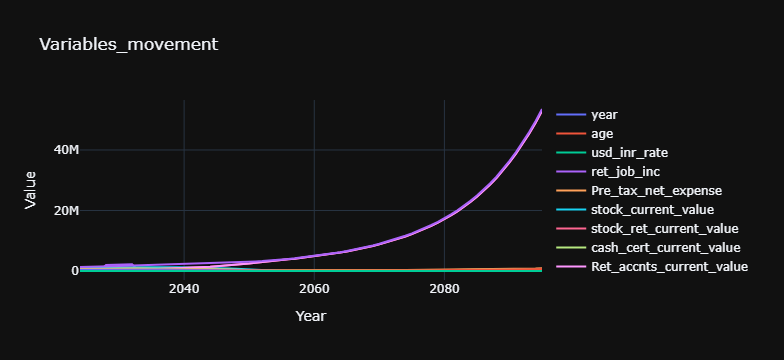

In [8]:
summary_df = clean_summary_df(simulation_var_df)
fig = go.Figure()
for column in summary_df.columns:
    fig.add_trace(go.Scatter(x=summary_df['year'], y=summary_df[column], mode='lines', name=column))

fig.update_layout(
    title='Variables_movement',
    xaxis_title='Year',
    yaxis_title='Value',
    template='plotly_dark'
)

# Show the plot
fig.show()

In [9]:
# # Function to convert INR investments to USD
# def convert_inr_to_usd(inr_value, usd_inr_rate, usd_inr_mean_growth, usd_inr_std, years):
#     usd_values = [inr_value / usd_inr_rate]
#     for year in range(1, years + 1):
#         usd_inr_rate *= np.random.normal(1 + usd_inr_mean_growth, usd_inr_std)
#         usd_value = inr_value / usd_inr_rate
#         usd_values.append(usd_value)
#     return usd_values

 

# # Function to calculate investment growth with beta adjustment and yearly additions
# def calculate_investment_growth_with_beta(current_value, mean_yoy_growthrate, std_yoy_growthrate, beta, additions_yearly, years):
#     values = [current_value]
#     for year in range(1, years + 1):
#         market_growth_rate = np.random.normal(stock_market_mean_yoy_growthrate_percent / 100, stock_market_std_yoy_growthrate)
#         adjusted_growth_rate = mean_yoy_growthrate / 100 + beta * (market_growth_rate - stock_market_mean_yoy_growthrate_percent / 100)
#         new_value = values[-1] * (1 + adjusted_growth_rate) + additions_yearly
#         values.append(new_value)
#     return values

# # Function to calculate investment growth for non-stock investments with yearly additions
# def calculate_investment_growth(current_value, mean_yoy_growthrate, std_yoy_growthrate, additions_yearly, years):
#     values = [current_value]
#     for year in range(1, years + 1):
#         growth_rate = np.random.normal(mean_yoy_growthrate / 100, std_yoy_growthrate)
#         new_value = values[-1] * (1 + growth_rate) + additions_yearly
#         values.append(new_value)
#     return values

# # Function to calculate real estate investment with mortgage, rental income, taxes, etc.
# def calculate_real_estate_investment(investment, years):
#     values = [investment['current_value']]
#     mortgage_principal = investment['current_value'] * (1 - investment['down_percent'] / 100)
#     mortgage_payment = calculate_mortgage_payment(mortgage_principal, investment['mortgage_percent'], investment['mortgage_term'])
#     for year in range(1, years + 1):
#         if current_year + year < investment['mortgage_start_year'] + investment['mortgage_term']:
#             mortgage_payment_yearly = mortgage_payment * 12
#         else:
#             mortgage_payment_yearly = 0
#         rental_income = investment['rental_income'] * (1 + investment['rental_income_yoy_inc_percent'] / 100) ** year
#         property_tax = investment['current_value'] * investment['property_tax_percent'] / 100
#         yearly_costs = mortgage_payment_yearly + property_tax + investment['HOA_or_maintainance'] * 12 + investment['home_insurance'] * 12 + investment['yearly_misc_repair_or_other']
#         new_value = values[-1] * (1 + investment['mean_yoy_growthrate_percent'] / 100) + rental_income - yearly_costs
#         values.append(new_value)
#     return values

# # Simulating the investment growth for each investment
# investment_values = {}
# for key, investment in Investments.items():
#     if investment['currency'] == 'INR':
#         converted_values = convert_inr_to_usd(investment['current_value'], USD_INR_rate, USD_INR_mean_growth_percent, USD_INR_STD, years_to_calculate)
#         investment['current_value'] = converted_values[0]  # Use the converted initial value
#         values = calculate_investment_growth(investment['current_value'], investment['mean_yoy_growthrate_percent'], 0, investment.get('additions_yearly', 0), years_to_calculate)
#         investment_values[key] = values
#     elif investment['type'] == 'stock':
#         values = calculate_investment_growth_with_beta(investment['current_value'],investment['mean_yoy_growthrate_percent'],investment['std_yoy_growthrate'], investment['beta'], investment['additions_yearly'], years_to_calculate)
#         investment_values[key] = values
#     elif investment['type'] == 'cash_certificate':
#         values = calculate_investment_growth(investment['current_value'], investment['mean_yoy_growthrate_percent'], 0, investment['additions_yearly'], years_to_calculate)
#         investment_values[key] = values
#     elif investment['type'] == 'real_estate':
#         values = calculate_real_estate_investment(investment, years_to_calculate)
#         investment_values[key] = values

# # Converting the investment values to a DataFrame for easier manipulation and visualization
# df_investments = pd.DataFrame(investment_values)
# df_investments.index = range(current_year, current_year + years_to_calculate + 1)

# # Plotting the investment values using Plotly
# fig = go.Figure()
# for column in df_investments.columns:
#     fig.add_trace(go.Scatter(x=df_investments.index, y=df_investments[column], mode='lines', name=column))

# fig.update_layout(
#     title='Investment Growth Over Time',
#     xaxis_title='Year',
#     yaxis_title='Value (USD)',
#     template='plotly_dark'
# )

# # Show the plot
# fig.show()
